# ** Forest Fires Problem **

# 1. Business Problem
    Classify the Size_Categorie using SVM.

# 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 3. Data Collection and Description

In [2]:
forest = pd.read_csv('forestfires.csv')
forest_df1 = forest.copy()
forest_df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forest_df1.shape

(517, 31)

In [4]:
forest_df1[forest_df1.columns[0:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [5]:
forest_df1[forest_df1.columns[0:11]].isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

## Finding Correlation

<AxesSubplot:>

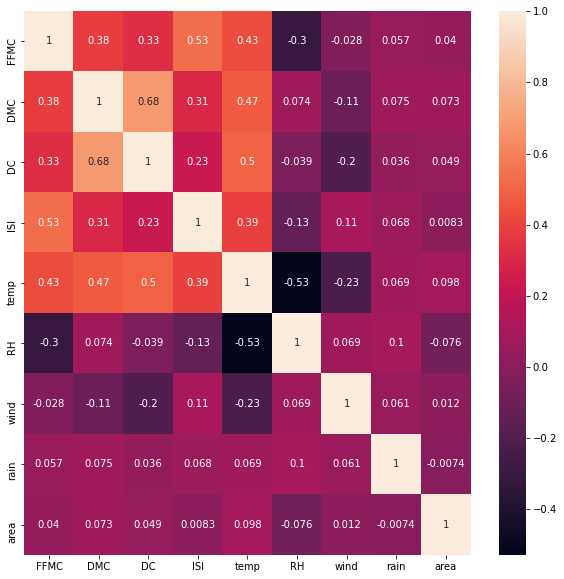

In [6]:
forest_corr = forest_df1[forest_df1.columns[0:11]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(forest_corr,annot=True)

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


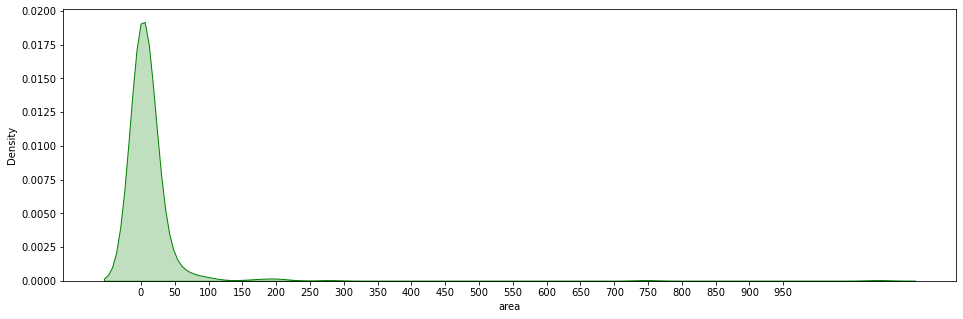

In [7]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(forest_df1['area'].skew()))
print("Kurtosis: {}".format(forest_df1['area'].kurtosis()))
ax = sns.kdeplot(forest_df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1000,50)])
plt.show()

### The Data is highly skewed and has large kurtosis value.
### Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land.

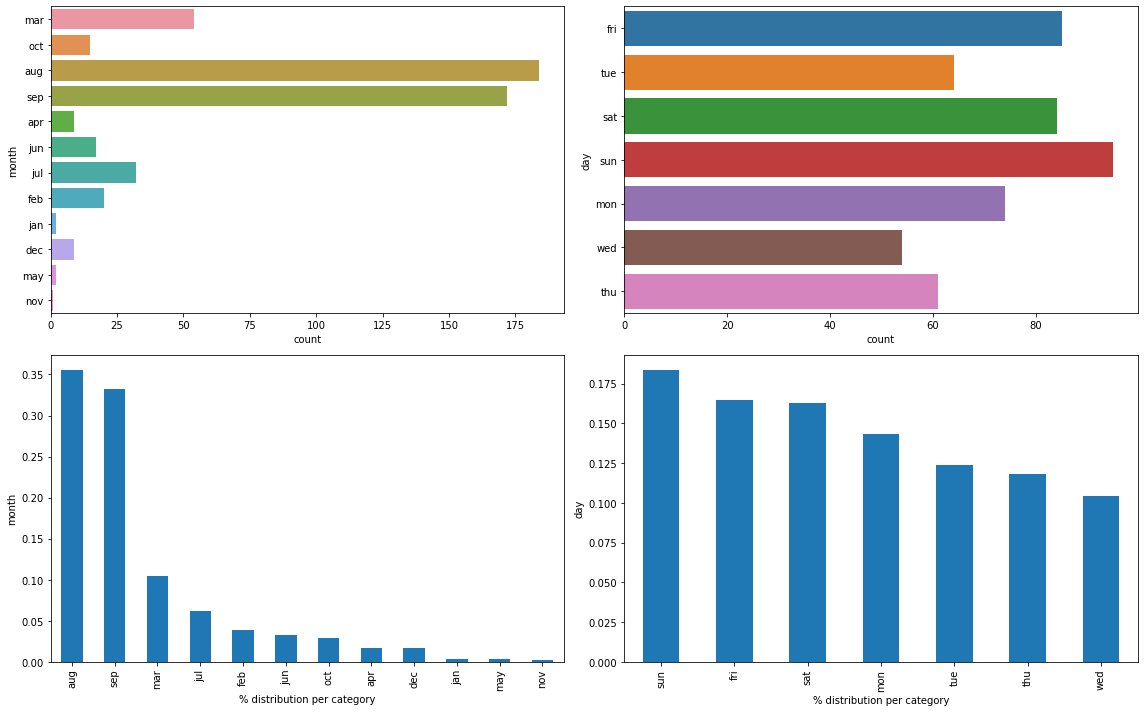

In [8]:
forest_dfa = forest_df1[forest_df1.columns[0:10]]
month_colum = forest_dfa.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=forest_dfa,y=col)
    plt.subplot(2,2,i+2)
    forest_df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

### Majority of the fire accors in the month Aug and Sep .
### For Days Sun and Fri have recoreded the most cases.

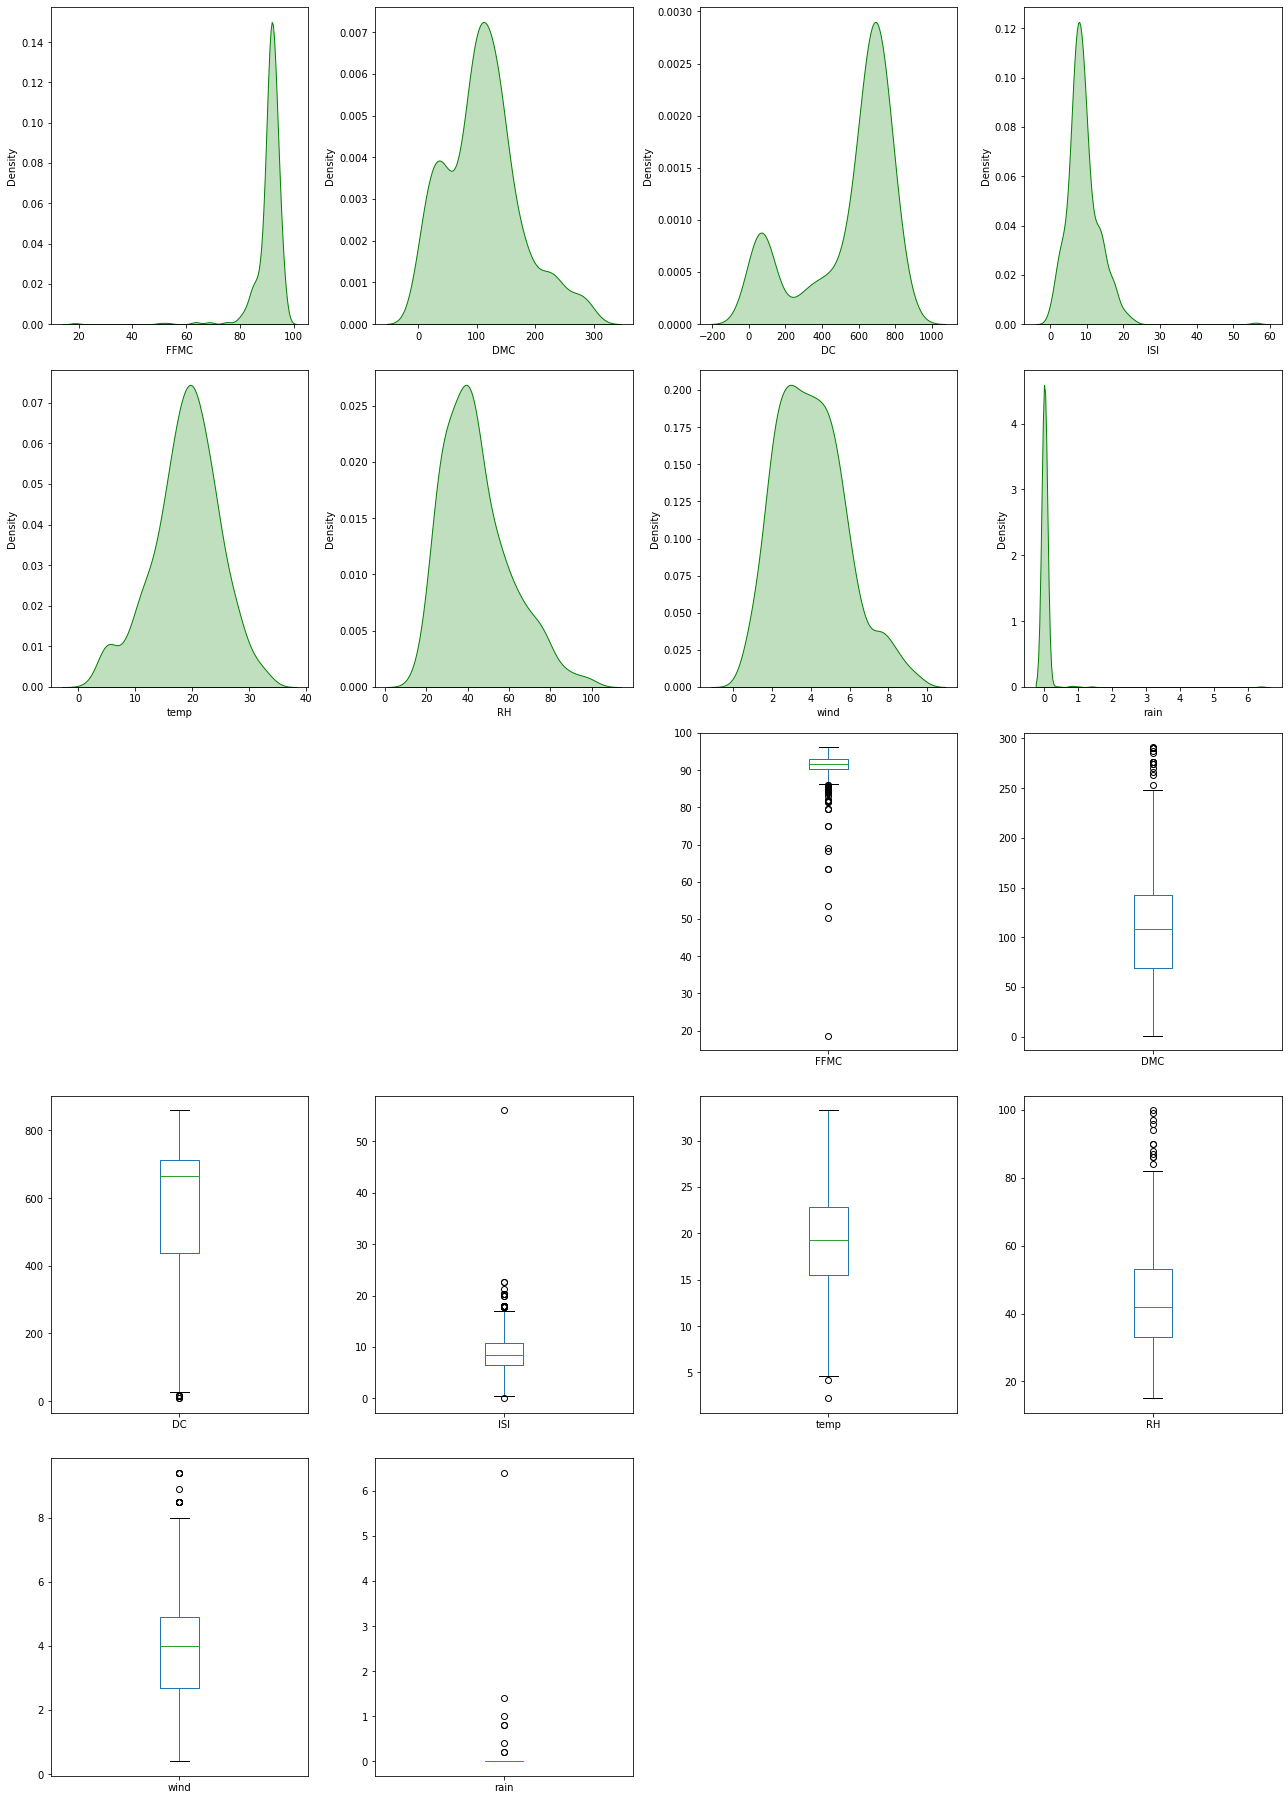

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [9]:
forest_num_columns = forest_dfa.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(forest_num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    forest[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = forest[forest_num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

# 4. Support Vector Machine

In [10]:
forest_X = forest_df1.iloc[:,2:30]
forest_y = forest_df1.iloc[:,30]
forest_mapping = {'small': 1, 'large': 2}
forest_y = forest_y.replace(forest_mapping)
x_train,x_test,y_train,y_test = train_test_split(forest_X,forest_y,test_size = 0.20, stratify = forest_y)

### 4.1 Using Liner Support Vector Machine

In [11]:
forest_model_linear = SVC(kernel = "linear")
forest_model_linear.fit(x_train,y_train)
forest_pred_test_linear = forest_model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, forest_pred_test_linear))

Accuracy: 0.9807692307692307


### 4.2 Using Poly Support Vector Machine

In [12]:
forest_model_poly = SVC(kernel = "poly")
forest_model_poly.fit(x_train,y_train)
forest_pred_test_poly = forest_model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, forest_pred_test_poly))

Accuracy: 0.7788461538461539


### 4.3 Using RBF Support Vector Machine

In [13]:
forest_model_rbf = SVC(kernel = "rbf")
forest_model_rbf.fit(x_train,y_train)
forest_pred_test_rbf = forest_model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, forest_pred_test_rbf))

Accuracy: 0.7596153846153846


### 4.4 Using Sigmoid Support Vector Machine

In [14]:
forest_model_sigmoid = SVC(kernel = "sigmoid")
forest_model_sigmoid.fit(x_train,y_train)
forest_pred_test_sigmoid = forest_model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, forest_pred_test_sigmoid))

Accuracy: 0.6346153846153846


# 5. Conclusion
    Liner SVM model gives the best accuracy.

# 6. Visualization
    Creating cluster using PCA for 2 variables.

In [15]:
forest_ytt = y_train.to_numpy()
forest_pca = PCA(n_components = 2)
forest_x_train2 = forest_pca.fit_transform(x_train)
forest_model_linear.fit(forest_x_train2, forest_ytt)

SVC(kernel='linear')

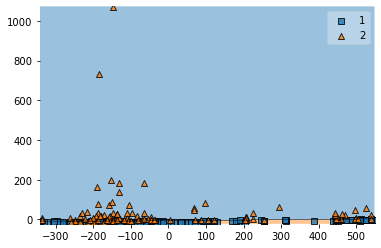

In [16]:
plot_decision_regions(forest_x_train2, forest_ytt, clf= forest_model_linear)
plt.show()

# ** Salary Data Problem **

# 1. Business Problem
     Prepare a classification model using SVM for salary data.

# 2. Data Collection and Description

In [17]:
salary_test = pd.read_csv('SalaryData_Test(1).csv')
salary_train = pd.read_csv('SalaryData_Train(1).csv')
salary_df = salary_test.append(salary_train)
salary_test_df = salary_test.copy()
salary_train_df = salary_train.copy()
salary_test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [18]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
number = LabelEncoder()
for i in str_c:
    salary_train_df[i]= number.fit_transform(salary_train_df[i])
    salary_test_df[i]=number.fit_transform(salary_test_df[i])

In [19]:
salary_test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [20]:
salary_train_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [21]:
mapping = {' >50K': 1, ' <=50K': 2}
salary_train_df = salary_train_df.replace({'Salary': mapping})
salary_test_df = salary_test_df.replace({'Salary': mapping})
df = salary_train_df.append(salary_test_df)
df1 = df.copy()
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [22]:
df1.shape

(45221, 14)

In [23]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0


In [24]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

## Finding Correlation

<AxesSubplot:>

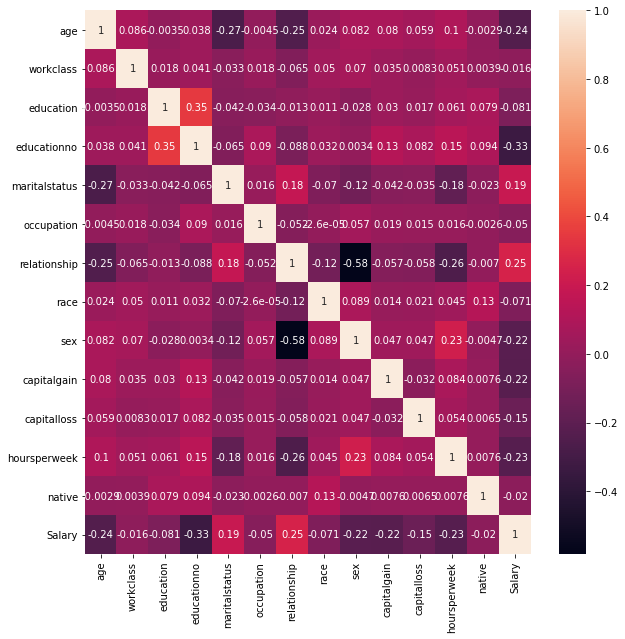

In [25]:
salary_corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(salary_corr,annot=True)

Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


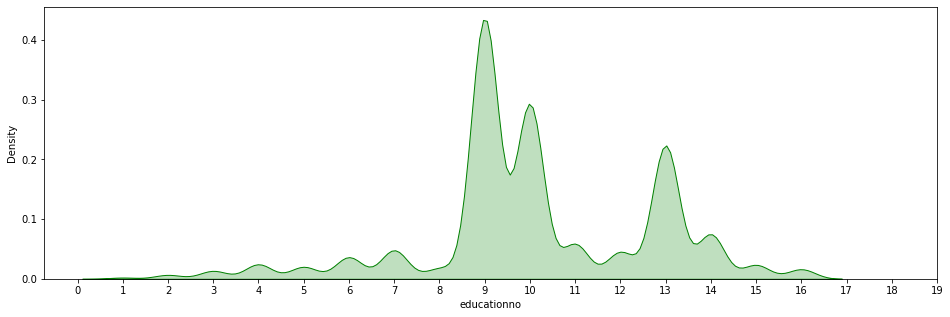

In [26]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

### The Data is negatively skewed and has low kurtosis value  
### Most of people have eduction Number of years of education 9 - 10

<ipython-input-27-2d9f8c4815d6>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


ValueError: num must be 1 <= num <= 4, not 5

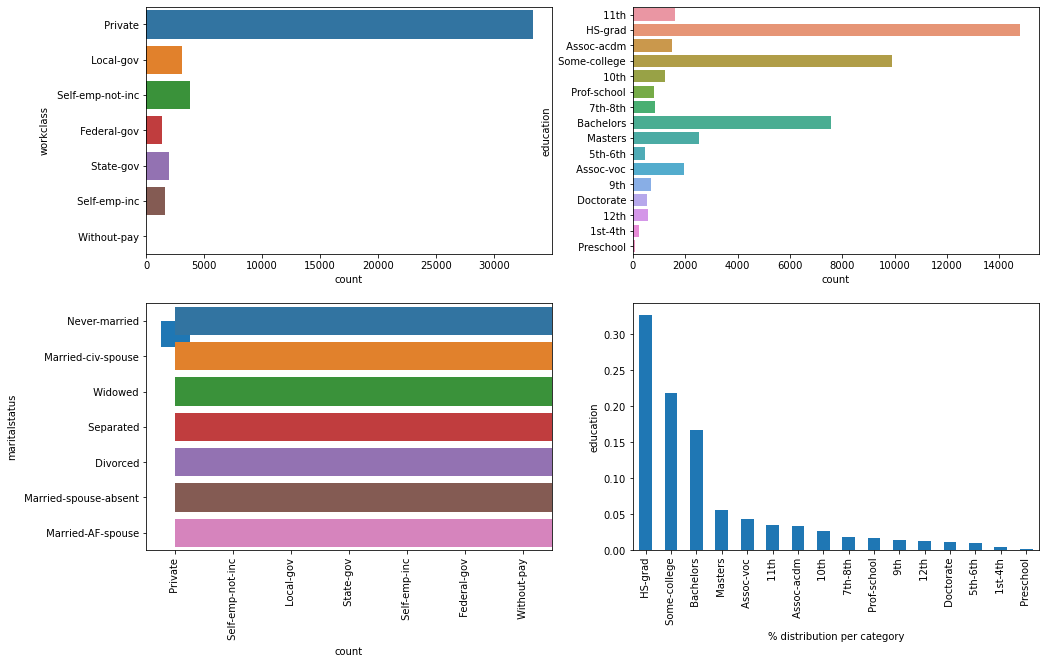

In [27]:
salary_dfa = salary_df[salary_df.columns[0:13]]
obj_colum = salary_dfa.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=salary_dfa,y=col)
    plt.subplot(2,2,i+2)
    salary_df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

### Majority of the workclass is in Private Sector  
### Also for education mojority of the people have HS graduation or some college degree

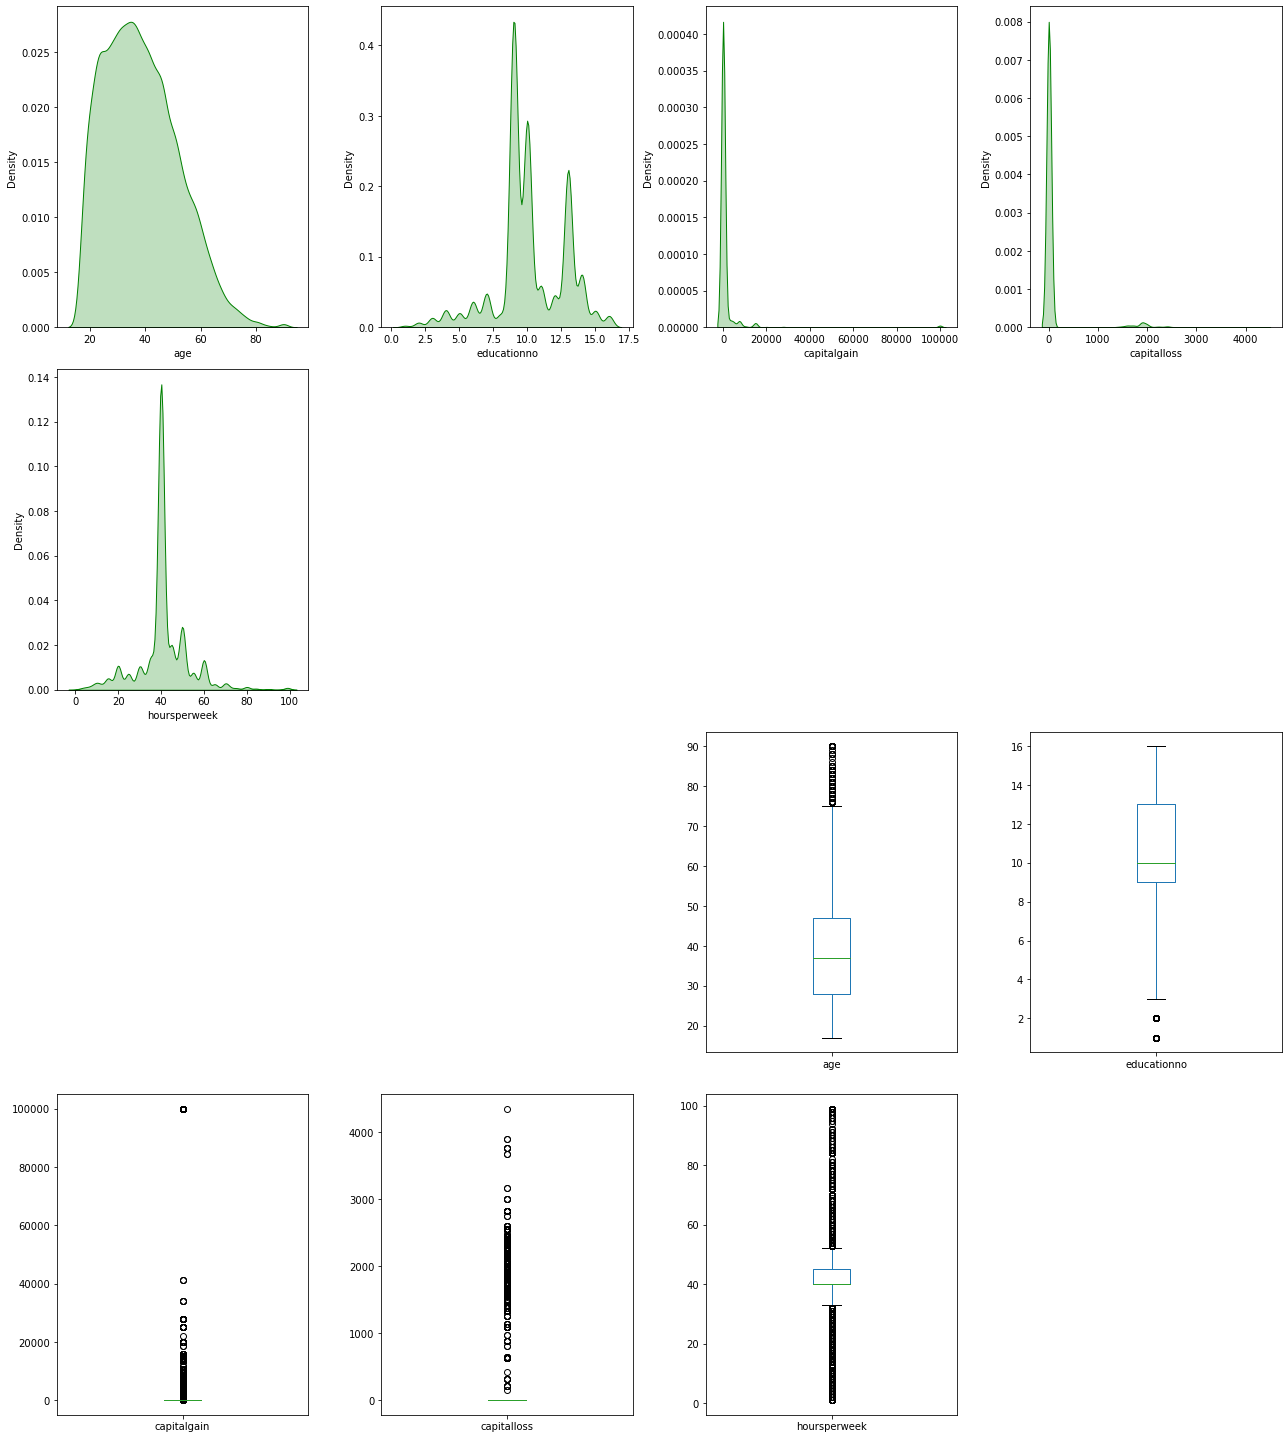

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.532784,-0.310621,11.788871,4.517536,0.340536
kurtosis,-0.155931,0.635045,150.147899,19.376085,3.201287


In [28]:
num_columns = salary_dfa.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

# 3. Support Vector Machine

In [29]:
col = df1.columns
x_train = salary_train_df[col[0:13]]
y_train = salary_train_df[col[13]]
x_test = salary_test_df[col[0:13]]
y_test = salary_test_df[col[13]]
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

### 3.1 Using Liner Support Vector Machine

In [30]:
salary_model_linear = SVC(kernel = "linear")
salary_model_linear.fit(x_train,y_train)
salary_pred_test_linear = salary_model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, salary_pred_test_linear))

Accuracy: 0.8097609561752988


### 3.2 Using Poly Support Vector Machine

In [31]:
salary_model_poly = SVC(kernel = "poly")
salary_model_poly.fit(x_train,y_train)
salary_pred_test_poly = salary_model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, salary_pred_test_poly))

Accuracy: 0.8435590969455511


### 3.3 Using RBF Support Vector Machine

In [32]:
salary_model_rbf = SVC(kernel = "rbf")
salary_model_rbf.fit(x_train,y_train)
salary_pred_test_rbf = salary_model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, salary_pred_test_rbf))

Accuracy: 0.8432934926958832


### 3.4 Using Sigmoid Support Vector Machine

In [33]:
salary_model_sigmoid = SVC(kernel = "sigmoid")
salary_model_sigmoid.fit(x_train,y_train)
salary_pred_test_sigmoid = salary_model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, salary_pred_test_sigmoid))

Accuracy: 0.5768924302788845


# 4. Conclusion
    Poly SVM model gives the best accuracy.